# <u> Median Absolute Deviation Class </u>

## Install this notebooks dependencies

In [1]:
!python -m pip install sortedcontainers
!python -m pip install scipy

## Definition and Implementation

In [2]:
from sortedcontainers import SortedList

In [3]:
from math import floor,ceil

In [21]:
class seq_mad :
    '''mad is a class for efficiently maintaining the median absolute 
    deviation of a collection of data which is subject to dynamic updates.
    The data is updated using the add and remove member functions both of
    which employ an efficient algorithm for updating the median absolute 
    deviation which has, for n data elements, a computational complexity of
    O(log(n)*log(n)).
    
    For details of the algorithm employed see 
    https://github.com/grosed/seqstats/tree/main/pdf/pseudo-code-library.pdf
    
    Attributes
    ----------
    mad : float
        If the seq_mad object has data elements then mad is the
        value of the median absolute deviation, otherwise its 
        value is equal to None
    
    T : SortedList
        A SortedList containing the data stored by the mad object. For 
        information regarding the SortedList data structure see 
        https://grantjenks.com/docs/sortedcontainers/sortedlist.html
        
    Methods
    -------
    add(x)
        Adds the data element x
        
    remove(x)
        removes the data element x  
    '''
    mad : float
    T : SortedList
    def __mad_algorithm(self,T) :
        if len(T) == 1 :
            return 0
        mu = (T[ceil(len(T)/2) - 1] + T[floor(len(T)/2)])/2
        a = 0
        b = floor(len(T)/2) - 1
        c = ceil(len(T)/2)
        d = len(T) - 1  
   
        def bisect(T,Ix,Iy,mu) :
            a,b = Ix
            c,d = Iy
            if b - a < 2 :
                if len(T) % 2 == 0 :
                    return (max(mu-T[b],T[c]-mu) + min(mu-T[a],T[d]-mu))/2
                else :
                    return min(max(mu-T[b],T[c]-mu),min(mu-T[a],T[d]-mu))
            (a,b) = (a + floor((b-a)/2), a + ceil((b-a)/2)) 
            (c,d) = (c + floor((d-c)/2), c + ceil((d-c)/2))
            if 4*mu > T[a] + T[b] + T[c] + T[d] :
                Ix = (a,Ix[1])
                Iy = (c,Iy[1])
            else :
                Ix = (Ix[0],b)
                Iy = (Iy[0],d)
            return bisect(T,Ix,Iy,mu)
    
        return bisect(T,(a,b),(c,d),mu)
    
    def __init__(self) :
        '''Creats an empty mad object.'''
        self.T = SortedList()
        self.mad = None
        
    def add(self, x : float) -> None : 
        '''Adds a data element x to the mad object and updates the median 
    absolute deviation. The computational complexity of this method 
    is O(log(n)*log(n)) in the size of the data.
           
    Parameters
    ----------
    x : float
        The data element to be added.
        '''
        self.T.add(x)
        self.mad = self.__mad_algorithm(self.T)
        return self.mad
    
    def remove(self, x : float) -> None :
        '''Removes a data element x to the mad object and updates the median 
    absolute deviation. The computational complexity of this method 
    is O(log(n)*log(n)) in the size of the data.
        
    If x is not in the data contained in the mad object then an exception
    is thrown.
        
    Parameters
    ----------
    x : float
        The data element to be removed.
        
    Raises
    ------
    ValueError
        If x is not in the data contained in the mad object.
        '''
        self.T.remove(x)
        if len(self.T) == 0 :
            self.mad = None
        else :
            self.mad = self.__mad_algorithm(self.T)
            

In [22]:
help(seq_mad)

Help on class seq_mad in module __main__:

class seq_mad(builtins.object)
 |  mad is a class for efficiently maintaining the median absolute 
 |  deviation of a collection of data which is subject to dynamic updates.
 |  The data is updated using the add and remove member functions both of
 |  which employ an efficient algorithm for updating the median absolute 
 |  deviation which has, for n data elements, a computational complexity of
 |  O(log(n)*log(n)).
 |  
 |  For details of the algorithm employed see 
 |  https://github.com/grosed/seqstats/tree/main/pdf/pseudo-code-library.pdf
 |  
 |  Attributes
 |  ----------
 |  mad : float
 |      If the seq_mad object has data elements then mad is the
 |      value of the median absolute deviation, otherwise its 
 |      value is equal to None
 |  
 |  T : SortedList
 |      A SortedList containing the data stored by the mad object. For 
 |      information regarding the SortedList data structure see 
 |      https://grantjenks.com/docs/so

## Tests

In [19]:
import unittest
from random import random,seed
from statistics import median


class test_mad(unittest.TestCase):
    
    def test_correct_mad_odd_number_of_elements(self) :
        seed(0)
        A = seq_mad()
        X = [random() for i in range(500)]
        for x in X :
            A.add(x)
        X_tilde = median(X)
        self.assertEqual(A.mu,median([abs(x-X_tilde) for x in X]))
        
    def test_correct_mad_even_number_of_elements(self) :
        seed(0)
        A = mad()
        X = [random() for i in range(501)]
        for x in X :
            A.add(x)
        X_tilde = median(X)
        self.assertEqual(A.mu,median([abs(x-X_tilde) for x in X]))
        
        
    def test_independent_instances(self) :
        seed(0)
        A = mad()
        X = [random() for i in range(500)]
        for x in X :
            A.add(x)
        X_tilde = median(X)
        self.assertEqual(A.mu,median([abs(x-X_tilde) for x in X]))
        B = mad()
        seed(1)
        X = [random() for i in range(500)]
        for x in X :
            B.add(x)
        X_tilde = median(X)
        self.assertEqual(B.mu,median([abs(x-X_tilde) for x in X]))
        
    def test_add(self) : 
        A = mad()
        A.add(3.14)
        A.add(2.14)
        self.assertEqual(A.T,SortedList([2.14,3.14]))   
        
    
    def test_remove_when_exists(self) : 
        A = mad()
        A.add(3.14)
        A.remove(3.14)
        self.assertEqual(A.T,SortedList([]))
    
    def test_remove_when_not_exists(self) : 
        A = mad()
        A.add(3.14)
        with self.assertRaises(ValueError):
            A.remove(2.14)
            
    def test_remove_when_empty(self) : 
        A = mad()
        with self.assertRaises(ValueError):
            A.remove(3.14)


In [20]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.test_mad) ... ok
test_correct_mad_even_number_of_elements (__main__.test_mad) ... ok
test_correct_mad_odd_number_of_elements (__main__.test_mad) ... ok
test_independent_instances (__main__.test_mad) ... ok
test_remove_when_empty (__main__.test_mad) ... ok
test_remove_when_exists (__main__.test_mad) ... ok
test_remove_when_not_exists (__main__.test_mad) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.035s

OK


### comparisons with SciPy

#### correct value - even number of elements

In [8]:
from scipy.stats import median_abs_deviation

In [9]:
A = mad()
X = [random() for i in range(500)]
for x in X :
    A.add(x)
print(A.mu)
print(median_abs_deviation(A.T))

0.23116439474295425
0.23116439474295425


#### correct value - odd number of elements

In [10]:
A = mad()
X = [random() for i in range(301)]
for x in X :
    A.add(x)
print(A.mu)
print(median_abs_deviation(A.T))

0.21918647336182018
0.21918647336182018


#### one element

In [11]:
A = mad()
A.add(3.14)
print(A.mu)
print(median_abs_deviation(A.T))

0
0.0


#### having removed an element

In [12]:
A = mad()
X = [random() for i in range(500)]
for x in X :
    A.add(x)
print(A.mu)
print(median_abs_deviation(A.T))
A.remove(A.T[10])
print(A.mu)
print(median_abs_deviation(A.T))

0.2599833320025597
0.2599833320025597
0.2583406120382905
0.2583406120382905


## Performance

### compare with SciPy 

In [13]:
from random import seed
import time
import statistics
from collections import deque

In [14]:
W = [2**n for n in range(1,17)]
seqstats_times = []
scipy_times = []
for w in W :
    A = mad()
    D = deque([random() for i in range(w)])
    for x in D :
        A.add(x)
    nreps = 100
    seqstats_reps = []
    scipy_reps = [] 
    for i in range(nreps) :
        x = random()
        y = D[0]
        start_time = time.perf_counter()
        A.add(x)
        A.remove(y)
        seqstats_reps.append(time.perf_counter() - start_time)
        start_time = time.perf_counter()
        D.append(x)
        D.popleft()
        median_abs_deviation(D)
        scipy_reps.append(time.perf_counter() - start_time)
    seqstats_times.append(statistics.mean(seqstats_reps))
    scipy_times.append(statistics.mean(scipy_reps))

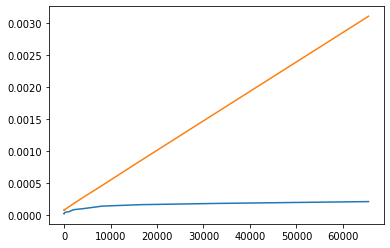

In [15]:
import matplotlib.pyplot as plt
plt.plot(W,seqstats_times)
plt.plot(W,scipy_times)

In [16]:
[y/x for x,y in zip(seqstats_times,scipy_times)]

[6.037110395597992,
 5.213480083846532,
 3.4567419418252796,
 2.9883742855241464,
 2.6786033939188303,
 2.4016304995285798,
 2.262006999360765,
 2.1698257285922837,
 2.3239860428632357,
 2.602161201212504,
 2.1982363881069316,
 2.8417712488313183,
 3.3914343949600174,
 5.33227848380827,
 8.999368455959367,
 15.062370824115002]